In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import numpy as np
from keras.models import load_model
import os

dire = 'E:/bird_data/'
DATA_PATH = dire + "output"

In [ ]:
import splitfolders
#splitfolders.ratio(DATA_PATH  + '/aaa', output=DATA_PATH  + '/val', seed=1337, ratio=(.5, .5)) 
splitfolders.ratio(dire + 'spec-song_test', output=dire +'a', seed=1337, ratio=(.5, .5)) 

In [27]:
#for moving files to another directory
origin = dire + '/spec-2stride'
dest = dire + '/spec'
for root, dirs, files in os.walk(origin):
    fold = root.split('\\')[-1]
    for file in files:
        #if '5s-noise-test' in file:
        #print(os.path.join(dest + "/" + fold, file))
            os.rename(os.path.join(root, file), os.path.join(dest+ "/" + fold, file))

In [2]:
IM_SIZE = (224, 224)

BIRDS = [
    "0Acant",
    "1Acrid",
    "2Alist",
    "3Antho",
    "4Antho",
    "5Cacat",
    "6Calyp",
    "7Corvu",
    "8Cract",
    "9Dacel",
    "10Eolop",
    "11Eopsa",
    "12Eudyn",
    "13Grall",
    "14Gymno",
    "15Malur",
    "16Manor",
    "17Neoch",
    "18Ocyph",
    "19Parda",
    "20Passe",
    "21Phyli",
    "22Platy",
    "23Pycno",
    "24Rhipi",
    "25Rhipi",
    "26Spilo",
    "27Strep",
    "28Trich",
    "29Zoste"
]

#labels in image data generater do not have the same label with the folder name, hence this dict
fixed_label = {
    '0Acant': 0, 
    '10Eolop': 1, 
    '11Eopsa': 2, 
    '12Eudyn': 3, 
    '13Grall': 4, 
    '14Gymno': 5,
    '15Malur': 6,
    '16Manor': 7,
    '17Neoch': 8, 
    '18Ocyph': 9, 
    '19Parda': 10, 
    '1Acrid': 11, 
    '20Passe': 12,
    '21Phyli': 13,
    '22Platy': 14, 
    '23Pycno': 15, 
    '24Rhipi': 16,
    '25Rhipi': 17, 
    '26Spilo': 18,
    '27Strep': 19, 
    '28Trich': 20, 
    '29Zoste': 21,
    '2Alist': 22, 
    '3Antho': 23, 
    '4Antho': 24, 
    '5Cacat': 25, 
    '6Calyp': 26, 
    '7Corvu': 27,
    '8Cract': 28,
    '9Dacel': 29}

fixed2 = ['0afrsi',
 '100oaham',
 '101omao',
 '102ospre',
 '103pagpl',
 '104palil',
 '105parja',
 '106pecsa',
 '107peflo',
 '108perfa',
 '109pibgr',
 '10bcnhe',
 '110pomja',
 '111puaio',
 '112recca',
 '113redav',
 '114redju',
 '115redph',
 '116refbo',
 '117rempa',
 '118rettr',
 '119ribgu',
 '11belki',
 '120rindu',
 '121rinph',
 '122rocpi',
 '123rorpa',
 '124rudtu',
 '125ruff',
 '126saffi',
 '127sande',
 '128sempl',
 '129sheow',
 '12bkbpl',
 '130shtsa',
 '131skyla',
 '132snogo',
 '133soosh',
 '134soote',
 '135sopsk',
 '136sora',
 '137spodo',
 '138sposa',
 '139towso',
 '13bknst',
 '140wanta',
 '141warwh',
 '142wesme',
 '143wessa',
 '144wetsh',
 '145whfib',
 '146white',
 '147whttr',
 '148wiltu',
 '149yebca',
 '14bkwpe',
 '150yefca',
 '151zebdo',
 '15blkfr',
 '16blkno',
 '17bongu',
 '18brant',
 '19brnbo',
 '1akeke',
 '20brnno',
 '21brnow',
 '22brtcu',
 '23bubsa',
 '24buffl',
 '25bulpe',
 '26burpa',
 '27buwte',
 '28cacgo',
 '29calqu',
 '2akepa',
 '30cango',
 '31canva',
 '32caste',
 '33categ',
 '34chbsa',
 '35chemu',
 '36chuka',
 '37cinte',
 '38comga',
 '39commy',
 '3akiap',
 '40compe',
 '41comsa',
 '42comwa',
 '43coope',
 '44creho',
 '45dunli',
 '46elepa',
 '47ercfr',
 '48eurwi',
 '49fragu',
 '4akiki',
 '50gadwa',
 '51gamqu',
 '52glwgu',
 '53gnwte',
 '54golph',
 '55grbhe',
 '56grefr',
 '57gresc',
 '58gryfr',
 '59gwfgo',
 '5amewi',
 '60hawam',
 '61hawco',
 '62hawcr',
 '63hawgo',
 '64hawha',
 '65hawpe',
 '66hoome',
 '67houfi',
 '68housp',
 '69hudgo',
 '6anian',
 '70iiwi',
 '71incte',
 '72jabwa',
 '73japqu',
 '74kalph',
 '75kauam',
 '76laugu',
 '77layal',
 '78lcspe',
 '79leasa',
 '7apapa',
 '80leate',
 '81lessc',
 '82lesye',
 '83lobdo',
 '84lotja',
 '85madpe',
 '86magpe',
 '87malla',
 '88masbo',
 '89maual',
 '8arcte',
 '90maupa',
 '91merli',
 '92mitpa',
 '93moudo',
 '94norca',
 '95norha',
 '96normo',
 '97norpi',
 '98norsh',
 '99nutma',
 '9barpe']


In [3]:
BIRDS = []
for root, dirs, files in os.walk('E:/train-image'):
    if len(dirs) > 0:
        BIRDS = dirs
        
BIRDS

['0afrsi',
 '100oaham',
 '101omao',
 '102ospre',
 '103pagpl',
 '104palil',
 '105parja',
 '106pecsa',
 '107peflo',
 '108perfa',
 '109pibgr',
 '10bcnhe',
 '110pomja',
 '111puaio',
 '112recca',
 '113redav',
 '114redju',
 '115redph',
 '116refbo',
 '117rempa',
 '118rettr',
 '119ribgu',
 '11belki',
 '120rindu',
 '121rinph',
 '122rocpi',
 '123rorpa',
 '124rudtu',
 '125ruff',
 '126saffi',
 '127sande',
 '128sempl',
 '129sheow',
 '12bkbpl',
 '130shtsa',
 '131skyla',
 '132snogo',
 '133soosh',
 '134soote',
 '135sopsk',
 '136sora',
 '137spodo',
 '138sposa',
 '139towso',
 '13bknst',
 '140wanta',
 '141warwh',
 '142wesme',
 '143wessa',
 '144wetsh',
 '145whfib',
 '146white',
 '147whttr',
 '148wiltu',
 '149yebca',
 '14bkwpe',
 '150yefca',
 '151zebdo',
 '15blkfr',
 '16blkno',
 '17bongu',
 '18brant',
 '19brnbo',
 '1akeke',
 '20brnno',
 '21brnow',
 '22brtcu',
 '23bubsa',
 '24buffl',
 '25bulpe',
 '26burpa',
 '27buwte',
 '28cacgo',
 '29calqu',
 '2akepa',
 '30cango',
 '31canva',
 '32caste',
 '33categ',
 '34ch

In [4]:
import re
import operator
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from collections import Counter
import matplotlib.pyplot as plt

def get_prediction_by_audio(model, test, fix_label=False):
    yhat_probs = model.predict(test, verbose=0)
    yhat_classes = np.argmax(yhat_probs, axis=1)
    
    filepaths = test.filepaths
    accuracy = accuracy_score(test.classes, yhat_classes)
    print('Accuracy: %f' % accuracy)
    
    precision = precision_score(test.classes, 
                            yhat_classes, 
                            average='weighted', 
                            zero_division=0)
    print('Precision: %f' % precision)
    
    # recall: tp / (tp + fn)
    recall = recall_score(test.classes, 
                      yhat_classes, 
                      average='weighted')
    print('Recall: %f' % recall)
    
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(test.classes, 
              yhat_classes,
              average='weighted')
    print('F1 score: %f' % f1)
    
    count = 0
    count_top3=0
    count_top5=0
    
    files={}
    for index, item in enumerate(filepaths):
        filename = item.split('\\')[-1].split('.')[0]
        if not filename in files:
            if fix_label:
                classname = fixed_label[item.split('\\')[1]]
                #classname = fixed.index(item.split('\\')[1])
            else:
                classname = re.findall(r'\d+',item.split('\\')[1])[0]
            files[filename] = {}
            files[filename]["class"] = int(classname)
            predict_dict = {}
            for i in range(30):
                predict_dict[i] = 0
            files[filename]["predict_dict"] = predict_dict
        
        for index2, values in enumerate(yhat_probs[index]):
            files[filename]["predict_dict"][index2] += values

    file_predict =[]
    file_actual = []
    for item in files:
        predict_dict = sorted(files[item]["predict_dict"].items(), key=operator.itemgetter(1),reverse=True)
        predict= predict_dict[0][0]
        actual = files[item]["class"]
        if predict == actual:
            count +=1
            
        file_predict.append(predict)
        file_actual.append(actual)
        predict_top3 = [predict_dict[0][0], predict_dict[1][0], predict_dict[2][0]]
        predict_top5 = [predict_dict[0][0], predict_dict[1][0], predict_dict[2][0], predict_dict[3][0], predict_dict[4][0]]
        print(predict_dict)
        if actual in predict_top3:
            count_top3 +=1
        if actual in predict_top5:
            count_top5 +=1
                 
    print("Audio accuracy: ", count/len(files))
    print("Audio top 3 accuracy: ", count_top3/len(files))
    print("Audio top 5 accuracy: ", count_top5/len(files))
    
    plt.bar(Counter(file_actual).keys(), Counter(file_actual).values())
    plt.show()
    print(classification_report(file_predict, file_actual))

Handcrafted CNN

In [7]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 30, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

classifier.summary()
# Part 2 - Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

valid_datagen = ImageDataGenerator(rescale = 1./255)

train_batches = train_datagen.flow_from_directory(
    dire + "/spec",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical', shuffle=True)

valid_batches = valid_datagen.flow_from_directory(
    dire + "/val",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 30)               

In [8]:
# class_weights = class_weight.compute_class_weight(
#     class_weight = 'balanced',
#     classes = np.unique(train_batches.classes), 
#     y = train_batches.classes
# )
# class_weights = {i : class_weights[i] for i in range(30)}

classifier.fit(
    train_batches,
    epochs = 30,
    validation_data = valid_batches,
    #class_weight = class_weights
)

classifier.save('models/cnn-spec.h5')

Epoch 1/30
279/279 [==============================] - 20s 60ms/step - loss: 2.5927 - accuracy: 0.2831 - val_loss: 2.4438 - val_accuracy: 0.3190
Epoch 2/30
279/279 [==============================] - 16s 59ms/step - loss: 2.2308 - accuracy: 0.3734 - val_loss: 2.3584 - val_accuracy: 0.3687
Epoch 3/30
279/279 [==============================] - 16s 58ms/step - loss: 2.0051 - accuracy: 0.4272 - val_loss: 2.3553 - val_accuracy: 0.3645
Epoch 4/30
279/279 [==============================] - 16s 59ms/step - loss: 1.8252 - accuracy: 0.4765 - val_loss: 2.2916 - val_accuracy: 0.4024
Epoch 5/30
279/279 [==============================] - 16s 59ms/step - loss: 1.6835 - accuracy: 0.5117 - val_loss: 2.3224 - val_accuracy: 0.4108
Epoch 6/30
279/279 [==============================] - 16s 59ms/step - loss: 1.5341 - accuracy: 0.5526 - val_loss: 2.3905 - val_accuracy: 0.3981
Epoch 7/30
279/279 [==============================] - 16s 59ms/step - loss: 1.3932 - accuracy: 0.5883 - val_loss: 2.5178 - val_accuracy:

In [9]:
#classifier = load_model('models/cnn.h5')
test_datagen = ImageDataGenerator(rescale = 1./255)

test_batches_current = test_datagen.flow_from_directory(
    dire + "/test",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle =False,
)

Found 1177 images belonging to 30 classes.


Accuracy: 0.363636
Precision: 0.383415
Recall: 0.363636
F1 score: 0.364352
0
[13, 16, 12, 8, 17]
0
[17, 21, 16, 13, 7]
0
[12, 21, 2, 8, 11]
0
[12, 1, 15, 13, 25]
1
[11, 12, 2, 15, 1]
1
[1, 13, 7, 16, 12]
1
[1, 7, 12, 13, 21]
1
[1, 12, 15, 2, 13]
1
[1, 15, 11, 21, 12]
1
[12, 1, 15, 11, 21]
1
[11, 12, 15, 1, 17]
1
[25, 8, 12, 29, 1]
1
[11, 12, 17, 25, 2]
1
[11, 14, 12, 2, 15]
2
[10, 2, 12, 15, 8]
2
[2, 17, 0, 16, 7]
2
[2, 17, 21, 15, 11]
2
[2, 7, 16, 6, 14]
2
[2, 22, 17, 11, 15]
2
[14, 29, 11, 12, 6]
2
[11, 2, 7, 15, 21]
2
[8, 21, 16, 13, 12]
2
[2, 7, 5, 22, 14]
3
[3, 8, 24, 21, 11]
3
[3, 19, 25, 17, 28]
3
[27, 3, 19, 15, 25]
3
[3, 19, 7, 27, 22]
3
[3, 29, 25, 19, 28]
3
[29, 3, 28, 12, 25]
3
[11, 28, 7, 6, 14]
3
[15, 12, 3, 14, 29]
3
[3, 19, 28, 25, 5]
3
[3, 5, 27, 19, 25]
3
[3, 19, 14, 25, 5]
4
[7, 12, 23, 20, 21]
4
[16, 1, 12, 4, 21]
4
[2, 4, 12, 21, 17]
5
[5, 19, 28, 3, 8]
5
[7, 12, 26, 25, 18]
5
[19, 10, 23, 5, 11]
5
[3, 5, 26, 15, 19]
5
[11, 12, 5, 19, 14]
5
[11, 23, 22, 14, 24]
6
[

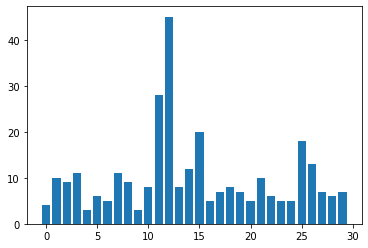

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         4
           2       0.56      0.50      0.53        10
           3       0.64      0.50      0.56        14
           4       0.00      0.00      0.00         0
           5       0.17      0.09      0.12        11
           6       0.40      0.40      0.40         5
           7       0.45      0.31      0.37        16
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          10       0.25      0.40      0.31         5
          11       0.54      0.29      0.38        51
          12       0.76      0.71      0.73        48
          13       0.25      0.33      0.29         6
          14       0.08      0.10      0.09        10
          15       0.55      0.41      0.47        27
          16       0.40      0.33      0.36         6
          17       0.14    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
get_prediction_by_audio(classifier, test_batches_current, True)

In [6]:
def process_data(proprocessing_function):
    train_datagen = ImageDataGenerator(
        preprocessing_function=proprocessing_function,  
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.1,
        fill_mode='nearest'
    )

    train_batches = train_datagen.flow_from_directory(
        #DATA_PATH + "/all-train",
        dire + '/spec',
        classes=BIRDS,
        target_size=IM_SIZE,
        class_mode='categorical', 
        shuffle=True,
        batch_size=32
    )

    valid_datagen = ImageDataGenerator(preprocessing_function=proprocessing_function)
    valid_batches = valid_datagen.flow_from_directory(
        #DATA_PATH + "/all-val",
        dire +'/val',
        classes=BIRDS,
        target_size=IM_SIZE,
        class_mode='categorical', 
        batch_size=32
    )

    test_datagen = ImageDataGenerator(preprocessing_function=proprocessing_function)
    test_batches = test_datagen.flow_from_directory(
        #DATA_PATH + "/all-test",
        dire + '/test',
        classes=BIRDS,
        target_size=IM_SIZE,
        class_mode="categorical",
        shuffle=False,
        batch_size=32,
    )
    
    return train_batches, valid_batches, test_batches
    #return train_batches, test_batches

def initialise_model(model, lr=0.001):
    x = model.output
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(len(BIRDS), activation="softmax", name="softmax")(x)
    model_out = Model(inputs=model.input, outputs=output_layer)
    model_out.compile(
        optimizer=Adam(learning_rate = lr), 
        loss="categorical_crossentropy", 
        metrics=["accuracy"]
    )
    
    return model_out

In [10]:
import matplotlib.pyplot as plt
def plot_result(result, model):
    plt.plot(result.history['accuracy'], label='Train')
    plt.plot(result.history['val_accuracy'], label='Validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title(model)
    plt.legend()
    plt.savefig(model+'.png', facecolor='white')
    plt.show()

In [7]:
ModelCheck = ModelCheckpoint('models/checkpoint.h5', monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=True, mode='auto', save_freq='epoch') 
ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,                               
                             patience=5, min_lr=3e-4)

XCeption

In [7]:
from tensorflow.keras.applications.xception import Xception, preprocess_input

train_batches, valid_batches, test_batches = process_data(preprocess_input)
xception = Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3)
)

xception_model = initialise_model(xception, 5e-4)

for layer in xception_model.layers[:20]:
    layer.trainable = False
for layer in xception_model.layers[20:]:
    layer.trainable = True

xception_model.summary()

Found 50871 images belonging to 30 classes.
Found 2315 images belonging to 30 classes.
Found 2290 images belonging to 30 classes.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0         

In [ ]:
#train the model
result = xception_model.fit(
    train_batches,
    validation_data = valid_batches,
    epochs = 30,
    callbacks=[ModelCheck,ReduceLR])

Epoch 1/30
1590/1590 [==============================] - 475s 295ms/step - loss: 3.1126 - accuracy: 0.2309 - val_loss: 2.7901 - val_accuracy: 0.3197
Epoch 2/30
1590/1590 [==============================] - 468s 294ms/step - loss: 1.7291 - accuracy: 0.5226 - val_loss: 1.9504 - val_accuracy: 0.5041
Epoch 3/30
1590/1590 [==============================] - 468s 294ms/step - loss: 1.2779 - accuracy: 0.6484 - val_loss: 1.5101 - val_accuracy: 0.6207
Epoch 4/30
1590/1590 [==============================] - 468s 294ms/step - loss: 1.0502 - accuracy: 0.7091 - val_loss: 1.6986 - val_accuracy: 0.6134
Epoch 5/30
1590/1590 [==============================] - 469s 295ms/step - loss: 0.8985 - accuracy: 0.7497 - val_loss: 1.5036 - val_accuracy: 0.6505
Epoch 6/30
1590/1590 [==============================] - 468s 294ms/step - loss: 0.7894 - accuracy: 0.7784 - val_loss: 1.4354 - val_accuracy: 0.6462
Epoch 7/30
1590/1590 [==============================] - 467s 294ms/step - loss: 0.7055 - accuracy: 0.8014 - val_

In [25]:
xception_model.save('models/xception_spec2.h5')

In [25]:
xception_model.evaluate(test_batches)

array([[7.51619041e-01, 5.65259645e-12, 1.29055558e-10, ...,
        1.09438604e-11, 2.25274532e-15, 1.68278293e-12],
       [2.65995026e-01, 6.88453878e-14, 3.85254708e-14, ...,
        3.88185406e-17, 4.51762397e-15, 2.97354861e-19],
       [3.38250965e-01, 1.50073998e-11, 1.66203051e-10, ...,
        4.77927031e-10, 5.20142207e-10, 8.92294390e-14],
       ...,
       [1.26314000e-14, 1.81543893e-17, 6.69244391e-12, ...,
        1.16003356e-14, 1.96741941e-23, 9.99999523e-01],
       [8.72339746e-21, 5.51744552e-25, 3.82513053e-19, ...,
        2.07361740e-21, 3.80923966e-29, 1.00000000e+00],
       [7.70240642e-18, 3.64171187e-22, 1.16056516e-14, ...,
        3.18403470e-16, 1.90985629e-26, 9.99999881e-01]], dtype=float32)

Accuracy: 0.692140
Precision: 0.708271
Recall: 0.692140
F1 score: 0.694894
[(0, 0.9995334148406982), (11, 0.0004451362765394151), (13, 9.068118743016385e-06), (21, 6.64898334434838e-06), (20, 3.0879268706485163e-06), (26, 1.6843582670844626e-06), (24, 9.19210208394361e-07), (25, 9.249271926137226e-08), (15, 2.4913981988561318e-08), (1, 2.0838179182192107e-08), (16, 1.1463770377417859e-08), (5, 5.147168025132487e-09), (12, 3.43853745476963e-09), (10, 1.9333934453413804e-09), (19, 9.854373983486653e-10), (9, 9.79986758409268e-10), (29, 7.91389037635426e-11), (4, 7.432852250355282e-11), (14, 1.6733961438752942e-11), (8, 8.448617673517678e-12), (2, 5.243805389909539e-12), (17, 5.012060644987715e-12), (6, 2.7076214534349496e-13), (3, 3.125523792687698e-14), (23, 2.6399387775648264e-14), (18, 1.599280874831771e-14), (7, 9.358962748935804e-15), (22, 8.688376081956994e-15), (27, 1.5128112199497843e-15), (28, 1.2642409279398148e-17)]
[(21, 0.8885307312011719), (17, 0.09125526994466782), (15, 0.

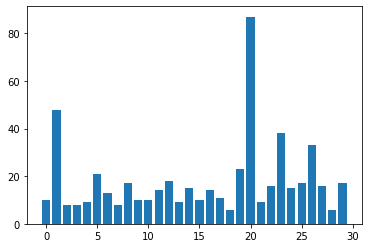

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.90      0.56      0.69        77
           2       0.62      0.83      0.71         6
           3       1.00      0.53      0.70        15
           4       0.33      0.50      0.40         6
           5       0.81      0.85      0.83        20
           6       0.69      1.00      0.82         9
           7       0.75      0.86      0.80         7
           8       0.76      0.54      0.63        24
           9       0.90      0.75      0.82        12
          10       0.60      1.00      0.75         6
          11       0.71      0.71      0.71        14
          12       1.00      0.78      0.88        23
          13       0.67      0.75      0.71         8
          14       0.73      0.92      0.81        12
          15       0.70      0.54      0.61        13
          16       0.79      0.79      0.79        14
          17       0.36    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#train all test all
xception_model = load_model('models/xception_spec3.h5')
get_prediction_by_audio(xception_model, test_batches, False)

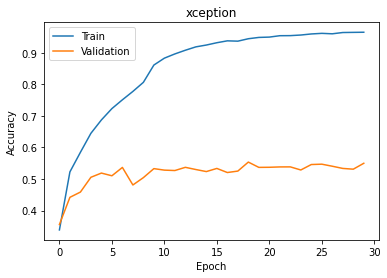

Accuracy: 0.544805
Precision: 0.549080
Recall: 0.544805
F1 score: 0.535884
Audio accuracy:  0.6626506024096386


In [37]:
#xception_model = load_model('models/' + 'xception.h5')
plot_result(result, 'xception')
#train call, test call
get_prediction_by_audio(xception_model, test_batches, False)

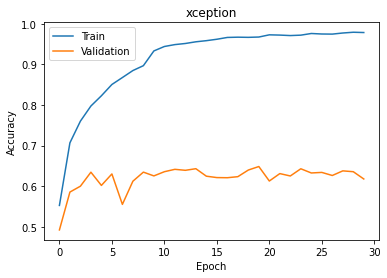

Accuracy: 0.624741
Precision: 0.636963
Recall: 0.624741
F1 score: 0.612561
Audio accuracy:  0.7425373134328358


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
plot_result(result, 'xception')
#train song, test song
get_prediction_by_audio(xception_model, test_batches, False)

In [15]:
#train song, test call
get_prediction_by_audio(xception_model, test_batches, False)

Found 6294 images belonging to 30 classes.
Accuracy: 0.443279
Precision: 0.449341
Recall: 0.443279
F1 score: 0.400410
Audio accuracy:  0.5210843373493976


In [23]:
#train call, test song
get_prediction_by_audio(xception_model, test_batches, False)

Found 5796 images belonging to 30 classes.
Accuracy: 0.636301
Precision: 0.703472
Recall: 0.636301
F1 score: 0.639313
Audio accuracy:  0.7238805970149254


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Found 12096 images belonging to 30 classes.
(12096, 30)
Accuracy: 0.650628
Precision: 0.673757
Recall: 0.650628
F1 score: 0.653854
Audio accuracy:  0.802065404475043
Audio top 3 accuracy:  0.8674698795180723
Audio top 5 accuracy:  0.9156626506024096


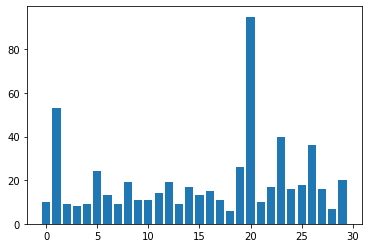

              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.91      0.68      0.77        71
           2       0.67      0.50      0.57        12
           3       0.75      1.00      0.86         6
           4       0.44      0.67      0.53         6
           5       0.83      0.91      0.87        22
           6       0.85      0.69      0.76        16
           7       0.78      1.00      0.88         7
           8       0.68      0.93      0.79        14
           9       1.00      0.85      0.92        13
          10       0.91      0.67      0.77        15
          11       0.79      0.85      0.81        13
          12       1.00      0.90      0.95        21
          13       0.89      1.00      0.94         8
          14       0.76      0.93      0.84        14
          15       0.69      0.69      0.69        13
          16       0.87      0.72      0.79        18
          17       0.18    

In [108]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(
        DATA_PATH + "/all-test",
        classes=BIRDS,
        target_size=IM_SIZE,
        class_mode="categorical",
        shuffle=False,
        batch_size=32,
    )
xception_model = load_model('models/' + 'xception-all.h5')
df = get_prediction_by_audio(xception_model, test_batches, False)
df

Efficient Net

In [21]:
import efficientnet.tfkeras as efn  # Convolutional Neural Network architecture
from efficientnet.keras import preprocess_input

train_batches, valid_batches, test_batches = process_data(preprocess_input)

# Define CNN's architecture
efn = efn.EfficientNetB3(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=(224, 224, 3)
)

efn_model = initialise_model(efn)
print(efn_model.summary())

Found 37251 images belonging to 30 classes.
Found 6311 images belonging to 30 classes.
Found 6294 images belonging to 30 classes.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 40) 1080        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 40) 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 40) 0       

In [25]:
#Train the model
result = efn_model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=30,
    callbacks=[ModelCheck,ReduceLR]
)
efn_model.save('models/efn.h5')

Epoch 1/30


ResourceExhaustedError:  OOM when allocating tensor with shape[9216] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model_1/block3b_se_squeeze/Mean (defined at Users\Admin\AppData\Local\Temp/ipykernel_14160/132159443.py:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_207102]

Errors may have originated from an input operation.
Input Source operations connected to node model_1/block3b_se_squeeze/Mean:
 model_1/block3b_activation/mul (defined at ProgramData\Anaconda3\lib\site-packages\efficientnet\model.py:155)

Function call stack:
train_function


Inception ResNet V2

In [6]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

train_batches, valid_batches, test_batches = process_data(preprocess_input)
ir = InceptionResNetV2(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=(224, 224, 3)
)

for layer in ir.layers[:30]:
    layer.trainable = False
for layer in ir.layers[30:]:
    layer.trainable = True
    
ir_model = initialise_model(ir)
print(ir_model.summary())

Found 37251 images belonging to 30 classes.
Found 6311 images belonging to 30 classes.
Found 6294 images belonging to 30 classes.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0         

In [7]:
result = ir_model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=20,
    callbacks=[ModelCheck,ReduceLR]
)

Epoch 1/20
1165/1165 [==============================] - 328s 270ms/step - loss: 3.0375 - accuracy: 0.3393 - val_loss: 3.8546 - val_accuracy: 0.2031
Epoch 2/20
1165/1165 [==============================] - 311s 267ms/step - loss: 2.5301 - accuracy: 0.4098 - val_loss: 4.7293 - val_accuracy: 0.2039
Epoch 3/20
1165/1165 [==============================] - 311s 267ms/step - loss: 2.8034 - accuracy: 0.4176 - val_loss: 12.1345 - val_accuracy: 0.2878
Epoch 4/20
1165/1165 [==============================] - 311s 267ms/step - loss: 2.3372 - accuracy: 0.4399 - val_loss: 2.5401 - val_accuracy: 0.3234
Epoch 5/20
1165/1165 [==============================] - 311s 267ms/step - loss: 2.1663 - accuracy: 0.4602 - val_loss: 115.6642 - val_accuracy: 0.3613
Epoch 6/20
1165/1165 [==============================] - 311s 267ms/step - loss: 2.1826 - accuracy: 0.4774 - val_loss: 2.2722 - val_accuracy: 0.3759
Epoch 7/20
1165/1165 [==============================] - 311s 267ms/step - loss: 2.2014 - accuracy: 0.4991 - v

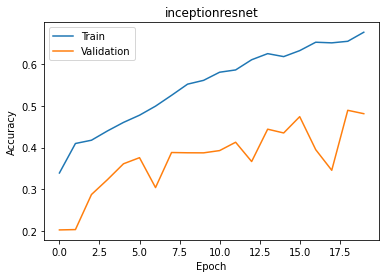

Accuracy: 0.480458
Precision: 0.492934
Recall: 0.480458
F1 score: 0.464672
Audio accuracy:  0.5903614457831325


In [11]:
#ir_model.save('models/inceptionresnet.h5')
plot_result(result, 'inceptionresnet')
get_prediction_by_audio(ir_model, test_batches, False)

ResNet50

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

train_batches, valid_batches, test_batches = process_data(preprocess_input)
resnet = ResNet50(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=(224, 224, 3)
)

resnet_model = initialise_model(resnet)
print(resnet_model.summary())

Found 37251 images belonging to 30 classes.
Found 6311 images belonging to 30 classes.
Found 6294 images belonging to 30 classes.
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256     

In [18]:
result= resnet_model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=30,
    callbacks=[ModelCheck,ReduceLR]
)

Epoch 1/30
1165/1165 [==============================] - 304s 257ms/step - loss: 3.2600 - accuracy: 0.2984 - val_loss: 4.8943 - val_accuracy: 0.1836
Epoch 2/30
1165/1165 [==============================] - 297s 254ms/step - loss: 2.4463 - accuracy: 0.3430 - val_loss: 8.0986 - val_accuracy: 0.1895
Epoch 3/30
1165/1165 [==============================] - 294s 252ms/step - loss: 2.2986 - accuracy: 0.3833 - val_loss: 4.1264 - val_accuracy: 0.2453
Epoch 4/30
1165/1165 [==============================] - 296s 254ms/step - loss: 2.1850 - accuracy: 0.4088 - val_loss: 5.8104 - val_accuracy: 0.1765
Epoch 5/30
1165/1165 [==============================] - 300s 257ms/step - loss: 2.1086 - accuracy: 0.4261 - val_loss: 5.2326 - val_accuracy: 0.2619
Epoch 6/30
1165/1165 [==============================] - 307s 263ms/step - loss: 2.0329 - accuracy: 0.4424 - val_loss: 5.5920 - val_accuracy: 0.2524
Epoch 7/30
1165/1165 [==============================] - 284s 244ms/step - loss: 1.9512 - accuracy: 0.4613 - val_

C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


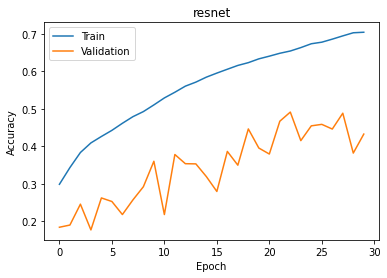

In [19]:
resnet_model.save('models/resnet.h5')
plot_result(result, 'resnet')

In [20]:
get_prediction_by_audio(resnet_model, test_batches, False)

Accuracy: 0.430887
Precision: 0.493413
Recall: 0.430887
F1 score: 0.422887
Audio accuracy:  0.49096385542168675


In [18]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

train_batches, valid_batches, test_batches = process_data(preprocess_input)
mobilenet = MobileNetV2(
    include_top=False, weights="imagenet", input_tensor=None, input_shape=(224, 224, 3)
)

    
mobilenet_model = initialise_model(mobilenet)
print(mobilenet_model.summary())

Found 37251 images belonging to 30 classes.
Found 6311 images belonging to 30 classes.
Found 6294 images belonging to 30 classes.
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0       

In [19]:
result = mobilenet_model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=20,
)

Epoch 1/20
1165/1165 [==============================] - 292s 249ms/step - loss: 3.1693 - accuracy: 0.3078 - val_loss: 99.4641 - val_accuracy: 0.1765
Epoch 2/20
1165/1165 [==============================] - 286s 245ms/step - loss: 2.8076 - accuracy: 0.3303 - val_loss: 9.7664 - val_accuracy: 0.0284
Epoch 3/20
1165/1165 [==============================] - 287s 246ms/step - loss: 2.5533 - accuracy: 0.3360 - val_loss: 18.8344 - val_accuracy: 0.1987
Epoch 4/20
1165/1165 [==============================] - 286s 246ms/step - loss: 2.3837 - accuracy: 0.3711 - val_loss: 18.7956 - val_accuracy: 0.1844
Epoch 5/20
1165/1165 [==============================] - 282s 242ms/step - loss: 2.3528 - accuracy: 0.3857 - val_loss: 19.7501 - val_accuracy: 0.1981
Epoch 6/20
  21/1165 [..............................] - ETA: 4:13 - loss: 2.3418 - accuracy: 0.3950

KeyboardInterrupt: 

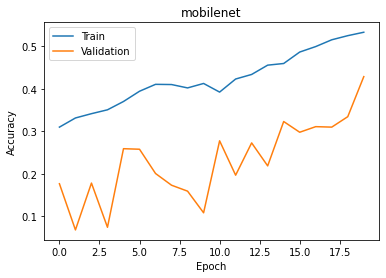

In [12]:
mobilenet_model.save('models/mobilenet.h5')
plot_result(result, 'mobilenet')

In [16]:
get_prediction_by_audio(mobilenet_model, test_batches, False)

Accuracy: 0.429457
Precision: 0.437344
Recall: 0.429457
F1 score: 0.379559
Audio accuracy:  0.463855421686747
